In [4]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as mp
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

In [8]:
white_wine = pd.read_csv(Path('Resources/White.csv'))
white_wine.head()

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year
0,Vermentino 2017,Italy,Toscana,Famiglia Castellani,3.8,25,5.65,2017
1,Ronco Broilo 2010,Italy,Colli Orientali del Friuli,Conte d'Attimis Maniago,4.3,25,44.90,2010
2,Weisser Schiefer s 2017,Austria,Südburgenland,Weinbau Uwe Schiefer,4.2,25,33.25,2017
3,Chardonnay 2018,Germany,Rheinhessen,Krämer - Straight,3.9,25,8.99,2018
4,Maganza Zibibbo 2018,Italy,Terre Siciliane,Luna Gaia,3.9,25,8.60,2018


In [9]:
for i in range(len(white_wine['Rating'])):
    if white_wine['Rating'][i] >= 4:
        white_wine.at[i,'Rating'] = 1
    else:
        white_wine.at[i,'Rating'] = 0

In [10]:
white_wine.value_counts("Rating")

Rating
0.0    2653
1.0    1111
dtype: int64

In [5]:
white_wine = white_wine[white_wine.Year != "N.V."]

In [6]:
white_wine.value_counts("Year")

Year
2018    1440
2017     787
2019     588
2016     484
2015     250
2014      85
2013      42
2012      26
2011      24
2010       5
2006       5
2005       4
2003       3
2007       3
2008       3
2020       2
2009       2
2004       2
1999       2
1998       1
1993       1
dtype: int64

In [7]:
print(white_wine.Rating.min())

1.0


In [8]:
y = white_wine["Rating"]

X = white_wine.drop(columns=["Rating", "Name", "Country", "Region", "Winery"])

In [9]:
y.head(20)

0     1.0
1     2.0
2     2.0
3     1.0
4     1.0
5     1.0
6     2.0
7     2.0
8     1.0
9     1.0
10    1.0
11    2.0
12    1.0
13    2.0
14    1.0
15    1.0
16    1.0
17    1.0
18    2.0
19    1.0
Name: Rating, dtype: float64

In [10]:
X.head()

,NumberOfRatings,Price,Year
0,25,5.65,2017
1,25,44.90,2010
2,25,33.25,2017
3,25,8.99,2018
4,25,8.60,2018


In [11]:
y.value_counts()

1.0    2649
2.0    1110
Name: Rating, dtype: int64

In [12]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assigned a random_state of 1 to the function

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(2819, 3)

In [13]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                random_state=1)
classifier

# Fit the model using training data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [14]:
predictions = classifier.predict(X_test)

In [15]:
balanced_accuracy_score(y_test, predictions)

0.7160827229455107

In [16]:
c_matrix = confusion_matrix(y_test, predictions)
print(c_matrix)

[[629  33]
 [144 134]]


In [17]:
class_report = classification_report(y_test, predictions)
print(class_report)

              precision    recall  f1-score   support

         1.0       0.81      0.95      0.88       662
         2.0       0.80      0.48      0.60       278

    accuracy                           0.81       940
   macro avg       0.81      0.72      0.74       940
weighted avg       0.81      0.81      0.80       940



                   Rating  NumberOfRatings     Price
Rating           1.000000         0.016513  0.372298
NumberOfRatings  0.016513         1.000000 -0.050213
Price            0.372298        -0.050213  1.000000


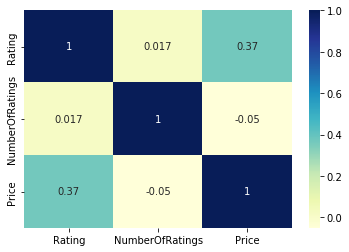

In [19]:
print(white_wine.corr())
dataplot = sb.heatmap(white_wine.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()